# Accessing and visualizing feature data

 - from feature service with multiple layers
 - from feature collection items
 - from a map service with feature access enabled

In [1]:
from arcgis.gis import *
from getpass import getpass

In [2]:
password=getpass()
gis = GIS("https://pycontraptions.maps.arcgis.com", "atma_mani", password)

········


Unable to generate token.
Invalid username or password.


RuntimeError: Unable to generate token.
Invalid username or password.
(Error Code: 400)

Search for a feature service titled 'fortune_500_styled_wfl'

In [50]:
search_result = gis.content.search('title:fortune_500_styled_wfl', item_type = 'Feature Layer')
search_result

[<Item title:"fortune_500_styled_wfl" type:Feature Service owner:atma_mani>]

<Item title:"fortune_500_styled_wfl" type:Feature Service owner:atma_mani>
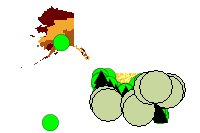

In [51]:
fortune_fl_item = search_result[0]
fortune_fl_item

Notice that this is a **Feature Layer Collection**

### Accessing a Feature Layer Collection
A Feature Layer Collection is simply a collection of Feature Layer objects

In [52]:
from arcgis.features import FeatureLayerCollection

In [53]:
fortune_fl_item.url

'https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer'

Notice the url ends with a `FeatureServer`. We can use this URL to instantiate a `FeatureLayerCollection` object.

In [54]:
flc = FeatureLayerCollection(fortune_fl_item.url, gis)
type(flc)

arcgis.features.layer.FeatureLayerCollection

In [55]:
flc.layers

[<FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/3">]

In [56]:
flc_ly1 = flc.layers[0]
type(flc_ly1)

arcgis.features.layer.FeatureLayer

Thus `FeatureLayerCollection.layers` = `[FeatureLayer]` objects

## Accessing a Feature Layer

In [57]:
fl_list = fortune_fl_item.layers
type(fl_list[0])

arcgis.features.layer.FeatureLayer

Thus FeatureLayer objects can be directly obtained from Item objects as well

In [58]:
fl_list

[<FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/xo9aDUkMXBivHk37/arcgis/rest/services/fortune_500_styled/FeatureServer/3">]

In [59]:
for layer in fl_list:
    print(layer.properties.name)

cities_over1mil
Fortune_500_Corporate_HQ
cities_over100k
Counties


In [60]:
cities_million_pop = fl_list[0]

In [61]:
cities_million_pop.properties.extent

{
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "xmin": -13627667.422245564,
  "xmax": -8238277.595337318,
  "ymax": 5210794.33529687,
  "ymin": 3473190.4835932995
}

In [62]:
map1 = gis.map('USA')
map1

In [63]:
map1.add_layer(cities_million_pop)

You can visualize `FeatureLayer` objects on the map widget

## Accessing FeatureSet objects
Let us query the FeatureLayer objected created above to get a `FeatureSet` in return

In [80]:
cities_million_pop.properties.capabilities

'Create,Delete,Query,Update,Editing'

Let us write an empty query so we can get all the features

In [78]:
cities_mil_fset = cities_million_pop.query()
type(cities_mil_fset)

arcgis.features.feature.FeatureSet

In [66]:
cities_mil_fset.geometry_type

'esriGeometryPoint'

In [67]:
cities_mil_fset.spatial_reference

{'latestWkid': 3857, 'wkid': 102100}

In [79]:
cities_mil_fset.df

,FEATURE,NAME,POP,geometry.x,geometry.y
OBJECTID,,,,,
1,"Population greater than 999,999 County Seat",Los Angeles,3485398,-1.316297e+07,4.035820e+06
2,"Population greater than 999,999 County Seat",San Diego,1110549,-1.304195e+07,3.857562e+06
3,"Population greater than 999,999 County Seat",New York City,7322564,-8.238278e+06,4.970310e+06
4,"Population greater than 999,999 County Seat",Philadelphia,1585577,-8.367174e+06,4.859018e+06
5,"Population greater than 999,999 County Seat",Dallas,1006877,-1.077579e+07,3.866612e+06
6,"Population greater than 999,999 County Seat",Houston,1630553,-1.061585e+07,3.473191e+06
7,"Population greater than 999,999 County Seat",Chicago,2783726,-9.757182e+06,5.138534e+06
8,"Population greater than 999,999 County Seat",Detroit,1027974,-9.244611e+06,5.210796e+06


## Accessing Feature objects
Now get the `Features` from cities over 1 million population `FeatureSet`

In [69]:
cities_mil_features = cities_mil_fset.features
type(cities_mil_features)

list

In [70]:
len(cities_mil_features)

8

In [71]:
type(cities_mil_features[0])

arcgis.features.feature.Feature

In [72]:
f1= cities_mil_features[0]

In [73]:
f1.geometry

{'x': -13162974.851296365, 'y': 4035820.2117743446}

# Editing features

In [74]:
# select 'NAME=New York'
ny_feature = [f for f in cities_mil_features if f.attributes['NAME']=='New York'][0]
ny_feature.attributes

{'FEATURE': 'Population greater than 999,999   County Seat',
 'NAME': 'New York',
 'OBJECTID': 3,
 'POP': 7322564}

In [75]:
import copy
ny_edit = copy.deepcopy(ny_feature)
ny_edit.attributes['NAME'] = 'New York City'

In [76]:
ny_edit

{"attributes": {"FEATURE": "Population greater than 999,999   County Seat", "NAME": "New York City", "POP": 7322564, "OBJECTID": 3}, "geometry": {"x": -8238277.756585079, "y": 4970310.197143376}}

In [77]:
update_result = cities_million_pop.edit_features(updates=[ny_edit])
update_result

{'addResults': [],
 'deleteResults': [],
 'updateResults': [{'globalId': None, 'objectId': 3, 'success': True}]}